# <font color='red'> Yapay Zeka Ara Sınav  Soru 2 </font>
Tolga HASTAOĞLU 21040201015

Aşağıdaki veri üzerinde sınıflandırıcılar ile tahminleme işlemini yapınız.  Lojistik Regresyon  Naïve Bayes  Destek Vektör Makineleri (Support Vector Machines-SVM)  kNN  Yapay Sinir Ağları (Neural Network) Her bir sınıflandırıcıdan alınan sonuçları ( Accuracy, Precision, Recall,F1-Score ) tablo halinde sonuçlarını gösteriniz. Rapora sonuçlarını ve karışıklık Matrisi (Confusion Matrix)lerini yazınız/çiziniz.

# <font color='green'> Veri Önişleme </font>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing

In [2]:
veriSeti=pd.read_csv("bank.csv")
veriSeti.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
veriSeti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


öncelikli olarak kategorik verileri sayısallaştıracağız

In [4]:
job_labels=["admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"]
job_encoder=preprocessing.LabelEncoder()
job_encoder.fit(job_labels)
veriSeti["job"]=job_encoder.transform(veriSeti["job"])


In [5]:
marrital_labels=["divorced","married","single","unknown"]
marrital_encoder=preprocessing.LabelEncoder()
marrital_encoder.fit(marrital_labels)
veriSeti["marital"]=marrital_encoder.transform(veriSeti["marital"])



In [6]:
edu_labels=["secondary","tertiary","primary","unknown"]
edu_encoder=preprocessing.LabelEncoder()
edu_encoder.fit(edu_labels)
veriSeti["education"]=edu_encoder.transform(veriSeti["education"])

In [7]:
default_labels=["no","yes","unknown"]
default_encoder=preprocessing.LabelEncoder()
default_encoder.fit(default_labels)
veriSeti["default"]=default_encoder.transform(veriSeti["default"])

In [8]:
housing_labels=["no","yes","unknown"]
housing_encoder=preprocessing.LabelEncoder()
housing_encoder.fit(housing_labels)
veriSeti["housing"]=housing_encoder.transform(veriSeti["housing"])

In [9]:
loan_labels=["no","yes","unknown"]
loan_encoder=preprocessing.LabelEncoder()
loan_encoder.fit(loan_labels)
veriSeti["loan"]=loan_encoder.transform(veriSeti["loan"])

In [10]:
contact_labels=["cellular","telephone","unknown"]
contact_encoder=preprocessing.LabelEncoder()
contact_encoder.fit(contact_labels)
veriSeti["contact"]=contact_encoder.transform(veriSeti["contact"])

In [11]:
month_labels=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
month_encoder=preprocessing.LabelEncoder()
month_encoder.fit(month_labels)
veriSeti["month"]=month_encoder.transform(veriSeti["month"])

In [12]:
poutcome_labels=["failure","success","other","unknown"]
poutcome_encoder=preprocessing.LabelEncoder()
poutcome_encoder.fit(poutcome_labels)
veriSeti["poutcome"]=poutcome_encoder.transform(veriSeti["poutcome"])

In [13]:
deposit_labels=["no","yes"]
deposit_encoder=preprocessing.LabelEncoder()
deposit_encoder.fit(deposit_labels)
veriSeti["deposit"]=deposit_encoder.transform(veriSeti["deposit"])

In [14]:
veriSeti

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,2,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,2,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,2,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,2,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,2,0,8,8,9,2,172,5,0,0


In [15]:
veriSeti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   default    11162 non-null  int32
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int32
 7   loan       11162 non-null  int32
 8   contact    11162 non-null  int32
 9   day        11162 non-null  int64
 10  month      11162 non-null  int32
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int32
 16  deposit    11162 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 1.0 MB


Görüldüğü üzere verilerimizin tümü sayısal hale geldi, kayıp veri olmadığı da görülmektedir. Yinelen veri olup olmadığının kontrolü yapılacak ve yinelenen veri varsa veri setinden çıkarılacaktır.

In [16]:
veriSeti[veriSeti.duplicated()==True]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [17]:
# İlk 15 veri bağımsız değişken, 16. veri ise bağımlı değişkendir, öznitelik seçimi için X ve y seçilmiştir.
X = veriSeti.iloc[:,0:16] 
y = veriSeti.iloc[:,-1] 

[0.07812234 0.05113745 0.02696254 0.03422706 0.00322281 0.07341083
 0.03632529 0.01595712 0.05651869 0.07863428 0.0906159  0.30145476
 0.05341625 0.03183954 0.02049447 0.04766067]


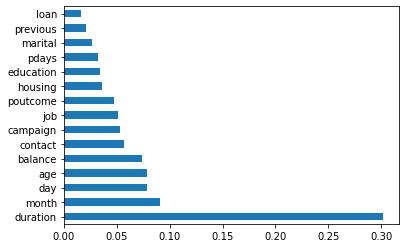

In [18]:
#Özniteliklerinin önemliliğine bakılarak çıkarılabilecek öznitelik olup olmadığı kontrol edilir.
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
oznitelik_onemliligi = pd.Series(model.feature_importances_, index=X.
columns)
oznitelik_onemliligi.nlargest(15).plot(kind='barh')
plt.show()

In [19]:
# Öznitelikler skorlandırılırken X değişkeninin içerisinde negatif değerler olduğu için ki-kare kullanılmamış, f_classif kullanılmıştır.
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['degişken','score']
print(scores.nlargest(15,'score'))

     degişken        score
11   duration  2864.172247
8     contact   743.025981
6     housing   484.045466
13      pdays   262.492195
14   previous   222.677159
12   campaign   186.129893
15   poutcome   169.651732
7        loan   138.153056
3   education   103.694195
5     balance    73.940086
2     marital    51.247746
1         job    45.032709
9         day    35.518905
4     default    18.498957
10      month    15.399674


# <font color='green'>Lojistik regresyon ile sınıflama ve sonuçları</font>

In [20]:
from sklearn import linear_model

In [21]:
#Lojistik regresyon kullanılabilmesi için verinin 2 sınıftan oluşması gerekmektedir. O nedenle önce bağımlı değişkende bulunan 
#faktörler kontrol edilir.
veriSeti["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [22]:
X = veriSeti.iloc[:,0:16] 
y = veriSeti.iloc[:,-1] 

In [23]:
# Öncelikle %75 eğitim, %25 test verisi ile çalışılacaktır.
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=5)

In [24]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [25]:
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [26]:
y_pred=model.predict(X_test)
print(model.intercept_,model.coef_)

[-0.06431481] [[ 0.07291413  0.04470288  0.10924521  0.16650115 -0.05150988  0.1101544
  -0.52807027 -0.23964031 -0.58529518 -0.06902596  0.10788658  1.73116477
  -0.38445388  0.38125499  0.2807899   0.2329753 ]]


In [27]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1213,  248],
       [ 300, 1030]], dtype=int64)

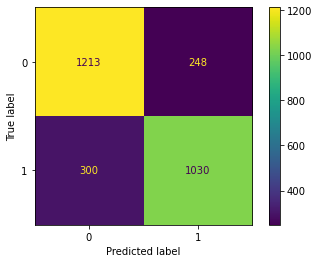

In [28]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

Karmaşıklık matrisine göre doğruların sayısı 1213+1030=2243, yanlışların sayısı ise 248+300=548'tir.
Buna göre oluşan accuracy, precision, recall ve f1 değerleri aşağıda gösterilmiştir.

In [29]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1461
           1       0.81      0.77      0.79      1330

    accuracy                           0.80      2791
   macro avg       0.80      0.80      0.80      2791
weighted avg       0.80      0.80      0.80      2791



# <font color='green'> En düşük önemliliğe loan, marital ve previous öznitelikleri çıkarılarak tekrar skorlara bakılacaktır</font>

In [30]:
#ilk önce loan çıkarılacaktır.
veriSeti1=veriSeti.copy()

In [31]:
veriSeti1.drop("loan",axis=1,inplace=True)

In [32]:
veriSeti1.head()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,2,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,2,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,2,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,2,5,8,673,2,-1,0,3,1


In [33]:

X = veriSeti1.iloc[:,0:15]
y = veriSeti.iloc[:,-1] 

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.intercept_,model.coef_)
confusion_matrix(y_true=y_test, y_pred=y_pred)
print(classification_report(y_true=y_test, y_pred=y_pred))

[-0.05151633] [[ 0.12000542  0.05045049  0.13779683  0.17221228 -0.07226275  0.09958645
  -0.54105329 -0.5174363  -0.06136805  0.11210377  1.73164182 -0.36469888
   0.36227866  0.27478847  0.16141745]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1458
           1       0.79      0.74      0.77      1333

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.78      0.78      0.78      2791



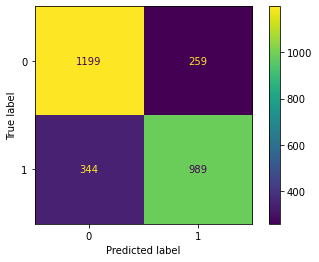

In [35]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

Loan özniteliğinin çıkarılması bir değişiklik yapmamıştır, diğer öznitelikler için tekrar bakılacaktır.

In [36]:
veriSeti2=veriSeti1.copy()

In [37]:
veriSeti2.drop("marital",axis=1,inplace=True)

In [38]:
veriSeti2.head()

,age,job,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,0,2343,2,2,5,8,1042,1,-1,0,3,1
1,56,0,1,0,45,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,0,1270,2,2,5,8,1389,1,-1,0,3,1
3,55,7,1,0,2476,2,2,5,8,579,1,-1,0,3,1
4,54,0,2,0,184,0,2,5,8,673,2,-1,0,3,1


In [39]:
X = veriSeti2.iloc[:,0:14]
y = veriSeti2.iloc[:,-1] 

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.intercept_,model.coef_)
confusion_matrix(y_true=y_test, y_pred=y_pred)
print(classification_report(y_true=y_test, y_pred=y_pred))


[-0.05027325] [[ 0.05610862  0.05521681  0.17892479 -0.07277318  0.10488305 -0.55365894
  -0.51709281 -0.0606762   0.1136838   1.72982508 -0.36741879  0.36258037
   0.27881672  0.16014126]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1458
           1       0.80      0.74      0.77      1333

    accuracy                           0.79      2791
   macro avg       0.79      0.78      0.78      2791
weighted avg       0.79      0.79      0.79      2791



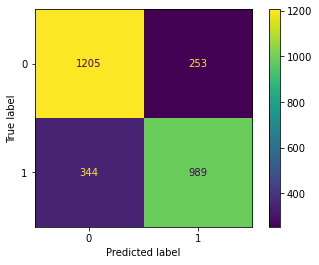

In [41]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

marital özniteliğinin çıkarılması da bir değişiklik yapmamıştır, son olarak previous özniteliği için tekrar bakılacaktır.

In [42]:
veriSeti3=veriSeti2.copy()

In [43]:
veriSeti3.drop("previous",axis=1,inplace=True)

In [44]:
veriSeti3.head()

,age,job,education,default,balance,housing,contact,day,month,duration,campaign,pdays,poutcome,deposit
0,59,0,1,0,2343,2,2,5,8,1042,1,-1,3,1
1,56,0,1,0,45,0,2,5,8,1467,1,-1,3,1
2,41,9,1,0,1270,2,2,5,8,1389,1,-1,3,1
3,55,7,1,0,2476,2,2,5,8,579,1,-1,3,1
4,54,0,2,0,184,0,2,5,8,673,2,-1,3,1


In [45]:
X = veriSeti3.iloc[:,0:13]
y = veriSeti3.iloc[:,-1] 

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.intercept_,model.coef_)
confusion_matrix(y_true=y_test, y_pred=y_pred)
print(classification_report(y_true=y_test, y_pred=y_pred))

[-0.05180362] [[ 0.06100284  0.05676323  0.17757032 -0.07503693  0.10843686 -0.55646151
  -0.5233429  -0.06234673  0.11988581  1.72112978 -0.35331588  0.40601396
   0.05154057]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1458
           1       0.79      0.74      0.77      1333

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.78      0.78      0.78      2791



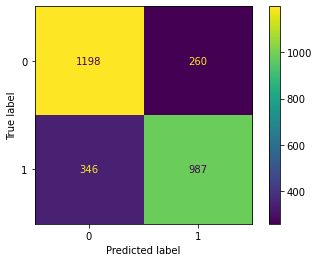

In [47]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [48]:
veriSeti4=veriSeti.copy()
veriSeti4.drop(["loan","marital","education","job","balance"],axis=1,inplace=True)

In [49]:
X = veriSeti4.iloc[:,0:11]
y = veriSeti4.iloc[:,-1] 

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.intercept_,model.coef_)
confusion_matrix(y_true=y_test, y_pred=y_pred)
print(classification_report(y_true=y_test, y_pred=y_pred))

[-0.0492107] [[ 0.0338673  -0.07848077 -0.58213926 -0.53307852 -0.05384281  0.11185372
   1.71606577 -0.3626294   0.35171582  0.28109769  0.14862234]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1458
           1       0.79      0.73      0.76      1333

    accuracy                           0.78      2791
   macro avg       0.78      0.77      0.78      2791
weighted avg       0.78      0.78      0.78      2791



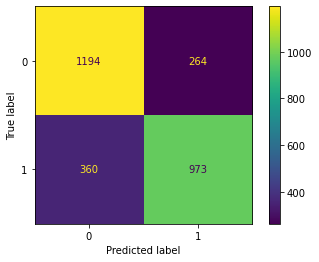

In [51]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

Bu 3 öznitelik modelde ciddi bir değişime sebeb olmamaktadır, bu nedenle ilk elde ettiğimiz değerler üzerinden gideceğiz. Modelimizin accuracy değeri %79 olup, %78 kesinlik ile tahmin yapmaktadır.
pozitif durumlar da, F1 skoru'da %79'tur, aynı veriler için Naive Bayes sınıflaması denenecektir.

# <font color='green'> NAIVE BAYES İLE SINIFLANDIRMA </font>

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
X = veriSeti.iloc[:,0:16]
y = veriSeti.iloc[:,-1] 

In [54]:
classifier=GaussianNB()


In [55]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [56]:
acuuracy=100*(y_test==y_pred).sum()/X_test.shape[0]
print("Accuracy is %", round(acuuracy,2) )

Accuracy is % 74.63


In [57]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1029,  429],
       [ 279, 1054]], dtype=int64)

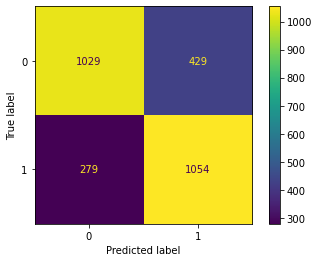

In [58]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

Karmaşıklık matrisine göre doğruların sayısı 1029+1054=2083, yanlışların sayısı ise 429+279=708'tir. Buna göre oluşan accuracy, precision, recall ve f1 değerleri aşağıda gösterilmiştir.

In [59]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.74      1458
           1       0.71      0.79      0.75      1333

    accuracy                           0.75      2791
   macro avg       0.75      0.75      0.75      2791
weighted avg       0.75      0.75      0.75      2791



In [60]:
veriSeti1=veriSeti.copy()
veriSeti1.drop("loan",axis=1,inplace=True)
X = veriSeti1.iloc[:,0:15]
y = veriSeti.iloc[:,-1] 
classifier=GaussianNB()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [61]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1058,  400],
       [ 318, 1015]], dtype=int64)

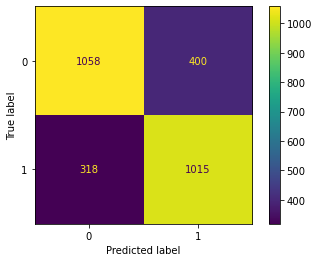

In [62]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [63]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1458
           1       0.72      0.76      0.74      1333

    accuracy                           0.74      2791
   macro avg       0.74      0.74      0.74      2791
weighted avg       0.74      0.74      0.74      2791



In [64]:
veriSeti2=veriSeti.copy()
veriSeti2.drop("marital",axis=1,inplace=True)
X = veriSeti2.iloc[:,0:15]
y = veriSeti2.iloc[:,-1] 
classifier=GaussianNB()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [65]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1029,  429],
       [ 284, 1049]], dtype=int64)

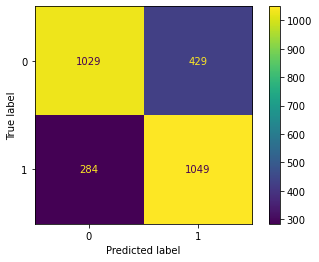

In [66]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [67]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1458
           1       0.71      0.79      0.75      1333

    accuracy                           0.74      2791
   macro avg       0.75      0.75      0.74      2791
weighted avg       0.75      0.74      0.74      2791



In [68]:
veriSeti3=veriSeti2.copy()
veriSeti3.drop("previous",axis=1,inplace=True)
X = veriSeti3.iloc[:,0:14]
y = veriSeti3.iloc[:,-1] 
classifier=GaussianNB()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [69]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[ 975,  483],
       [ 225, 1108]], dtype=int64)

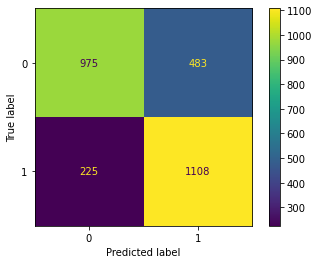

In [70]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [71]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1458
           1       0.70      0.83      0.76      1333

    accuracy                           0.75      2791
   macro avg       0.75      0.75      0.75      2791
weighted avg       0.76      0.75      0.75      2791



In [72]:
veriSeti4=veriSeti.copy()
veriSeti4.drop(["loan","marital","education","job","balance"],axis=1,inplace=True)
X = veriSeti4.iloc[:,0:11]
y = veriSeti4.iloc[:,-1] 

In [73]:
classifier=GaussianNB()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [74]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1043,  415],
       [ 296, 1037]], dtype=int64)

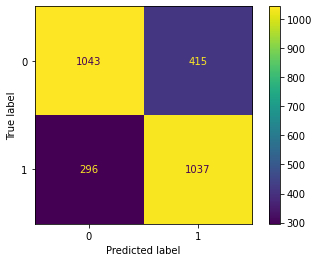

In [75]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [76]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1458
           1       0.71      0.78      0.74      1333

    accuracy                           0.75      2791
   macro avg       0.75      0.75      0.75      2791
weighted avg       0.75      0.75      0.75      2791



#  <font color='green'>SVM (DESTEK VEKTÖR MAKİNESİ) İLE SINIFLANDIRMA</font>

In [77]:
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier


In [78]:
X = veriSeti.iloc[:,0:16]
y = veriSeti.iloc[:,-1] 

In [79]:
classifier=OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X,y)

C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


OneVsOneClassifier(estimator=LinearSVC(random_state=0))

In [80]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
classifier=OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [81]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1448,   10],
       [1228,  105]], dtype=int64)

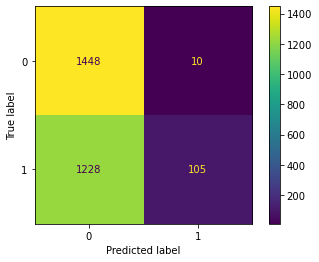

In [82]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

Karmaşıklık matrisine göre doğruların sayısı 1448+105=1553, yanlışların sayısı ise 1228+10=1238'tir. Buna göre oluşan accuracy, precision, recall ve f1 değerleri aşağıda gösterilmiştir. SVM ile False Negative Kısmında diğer sınıflayıcılara göre büyük bir artış ve True Negative kısmında büyük bir azalış olmuştur. Öznitelik silinmesi ile tekrar denenecektir.

In [83]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.54      0.99      0.70      1458
           1       0.91      0.08      0.15      1333

    accuracy                           0.56      2791
   macro avg       0.73      0.54      0.42      2791
weighted avg       0.72      0.56      0.44      2791



SVM ile en düşük doğruluk, kesinlik ve F1 değerleri elde edilmiştir, öznitelik silinmesi ile düzelmez ise SVM'nin bu veri seti için uygun olmadığı düşünülebilir

In [84]:
veriSeti1=veriSeti.copy()
veriSeti1.drop("loan",axis=1,inplace=True)
X = veriSeti1.iloc[:,0:15]
y = veriSeti.iloc[:,-1] 
classifier=OneVsOneClassifier(LinearSVC(random_state=0))
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [85]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1161,  297],
       [ 485,  848]], dtype=int64)

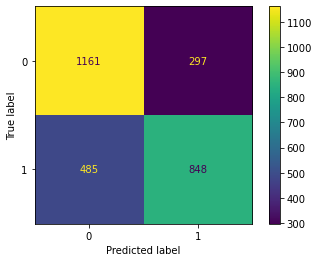

In [86]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [87]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1458
           1       0.74      0.64      0.68      1333

    accuracy                           0.72      2791
   macro avg       0.72      0.72      0.72      2791
weighted avg       0.72      0.72      0.72      2791



Loan özniteliğinin çıkarılması ile daha iyi sonuçlar elde edilmiştir, marital ve previous da çıkarılarak deneme yapılacaktır.

In [88]:
veriSeti2=veriSeti1.copy()
veriSeti2.drop("marital",axis=1,inplace=True)
X = veriSeti2.iloc[:,0:14]
y = veriSeti2.iloc[:,-1] 
classifier=OneVsOneClassifier(LinearSVC(random_state=0))
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [89]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1394,   64],
       [1261,   72]], dtype=int64)

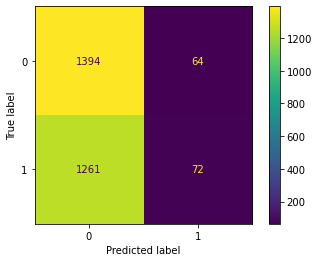

In [90]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [91]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.53      0.96      0.68      1458
           1       0.53      0.05      0.10      1333

    accuracy                           0.53      2791
   macro avg       0.53      0.51      0.39      2791
weighted avg       0.53      0.53      0.40      2791



marital özniteliğinin çıkarılması ile çok daha kötü sonuçlar elde edilmiştir, marital yeniden eklenip previous çıkarılarak deneme yapılacaktır.

In [92]:
veriSeti3=veriSeti1.copy()
veriSeti3.drop("previous",axis=1,inplace=True)
X = veriSeti3.iloc[:,0:14]
y = veriSeti3.iloc[:,-1] 
classifier=OneVsOneClassifier(LinearSVC(random_state=0))
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [93]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1051,  407],
       [ 241, 1092]], dtype=int64)

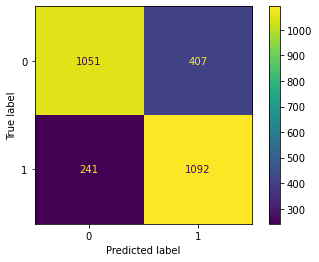

In [94]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [95]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1458
           1       0.73      0.82      0.77      1333

    accuracy                           0.77      2791
   macro avg       0.77      0.77      0.77      2791
weighted avg       0.77      0.77      0.77      2791



In [96]:
veriSeti4=veriSeti.copy()
veriSeti4.drop(["loan","marital","education","job","balance"],axis=1,inplace=True)
X = veriSeti4.iloc[:,0:11]
y = veriSeti4.iloc[:,-1] 

In [97]:
classifier=OneVsOneClassifier(LinearSVC(random_state=0))
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\22490046962\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [98]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[ 261, 1197],
       [   9, 1324]], dtype=int64)

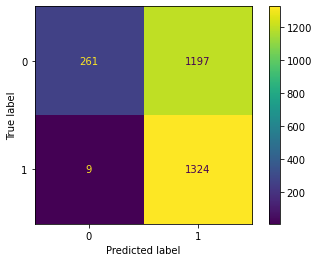

In [99]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [100]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      0.18      0.30      1458
           1       0.53      0.99      0.69      1333

    accuracy                           0.57      2791
   macro avg       0.75      0.59      0.49      2791
weighted avg       0.76      0.57      0.49      2791



Previous ve loan çıkarıldığında verisetinin accuracy,presicion, recall, f1 score artmıştır, Verisetinden önemlilik sırasına göre diğer öznitelikler de çıkarılarak denenmiştir ancak %77 accuracy üzerinde çıkılamamıştır bu nedenle veriseti en son bu haliyle bırakılmıştır.

# <font color='green'>KNN İLE SINIFLANDIRMA</font>

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
X = veriSeti.iloc[:,0:16]
y = veriSeti.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1118,  340],
       [ 397,  936]], dtype=int64)

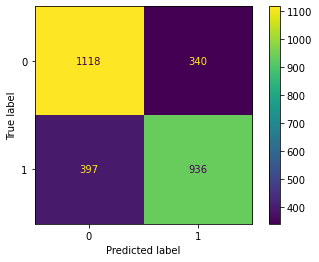

In [103]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

Karmaşıklık matrisine göre doğruların sayısı 1118+936=2054, yanlışların sayısı ise 397+340=737'tir. Buna göre oluşan accuracy, precision, recall ve f1 değerleri aşağıda gösterilmiştir

In [104]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1458
           1       0.73      0.70      0.72      1333

    accuracy                           0.74      2791
   macro avg       0.74      0.73      0.73      2791
weighted avg       0.74      0.74      0.74      2791



In [105]:
veriSeti1=veriSeti.copy()
veriSeti1.drop("loan",axis=1,inplace=True)
X = veriSeti1.iloc[:,0:15]
y = veriSeti.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1118,  340],
       [ 396,  937]], dtype=int64)

In [106]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1458
           1       0.73      0.70      0.72      1333

    accuracy                           0.74      2791
   macro avg       0.74      0.73      0.74      2791
weighted avg       0.74      0.74      0.74      2791



Setten Loan özniteliği çıkarılması neredeyse hiç bir değişikliğe neden olmamıştır bu nedenle çıkarılmadan marital ve previous denenecektir.

In [107]:
veriSeti2=veriSeti.copy()
veriSeti2.drop("marital",axis=1,inplace=True)
X = veriSeti2.iloc[:,0:15]
y = veriSeti2.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test) 
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1118,  340],
       [ 397,  936]], dtype=int64)

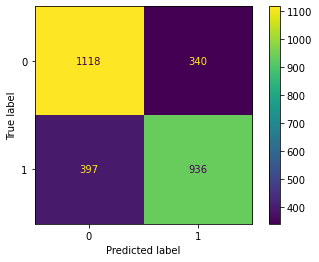

In [108]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [109]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1458
           1       0.73      0.70      0.72      1333

    accuracy                           0.74      2791
   macro avg       0.74      0.73      0.73      2791
weighted avg       0.74      0.74      0.74      2791



Setten marital özniteliği çıkarılması neredeyse hiç bir değişikliğe neden olmamıştır bu nedenle çıkarılmadan
previous denenecektir.

In [110]:
veriSeti3=veriSeti.copy()
veriSeti3.drop("previous",axis=1,inplace=True)
X = veriSeti3.iloc[:,0:1]
y = veriSeti3.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1214,  244],
       [ 989,  344]], dtype=int64)

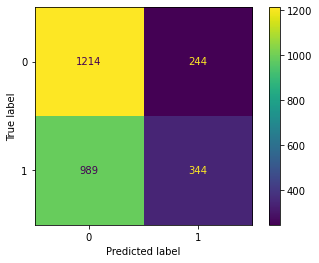

In [111]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [112]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66      1458
           1       0.59      0.26      0.36      1333

    accuracy                           0.56      2791
   macro avg       0.57      0.55      0.51      2791
weighted avg       0.57      0.56      0.52      2791



Setten previous özniteliği çıkarılması neredeyse hiç bir değişikliğe neden olmamıştır bu nedenle veri seti bu şekilde bırakılacaktır, 

In [113]:
veriSeti4=veriSeti.copy()
veriSeti4.drop(["loan","marital","education","job","balance"],axis=1,inplace=True)
X = veriSeti4.iloc[:,0:11]
y = veriSeti4.iloc[:,-1] 

In [114]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1178,  280],
       [ 354,  979]], dtype=int64)

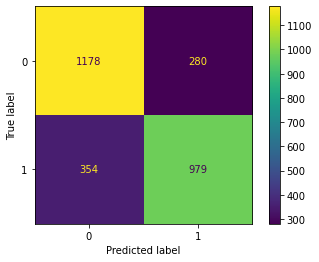

In [115]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [116]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1458
           1       0.78      0.73      0.76      1333

    accuracy                           0.77      2791
   macro avg       0.77      0.77      0.77      2791
weighted avg       0.77      0.77      0.77      2791



# <font color='green'>Yapay Sinir Ağları İle Sınıflandırma</font>

In [117]:
from scipy import stats
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier,MLPRegressor

In [118]:
X = veriSeti.iloc[:,0:16].values
y = veriSeti.iloc[:,-1].values
y=y.astype('int')
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)

In [119]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=scaler.fit_transform(y_train.reshape(-1,1))
y_test=scaler.fit_transform(y_test.reshape(-1,1))
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [120]:
siniflandirici=MLPRegressor(alpha=0.001,hidden_layer_sizes=(10,10),random_state=4, verbose=True, learning_rate_init=0.01)

In [121]:
siniflandirici.fit(X_train, y_train.values.ravel())

Iteration 1, loss = 0.50630678
Iteration 2, loss = 0.31911359
Iteration 3, loss = 0.29095184
Iteration 4, loss = 0.28361880
Iteration 5, loss = 0.27870865
Iteration 6, loss = 0.27521417
Iteration 7, loss = 0.27266792
Iteration 8, loss = 0.27132719
Iteration 9, loss = 0.27031966
Iteration 10, loss = 0.26773787
Iteration 11, loss = 0.26630875
Iteration 12, loss = 0.26518992
Iteration 13, loss = 0.26713405
Iteration 14, loss = 0.26375163
Iteration 15, loss = 0.26291229
Iteration 16, loss = 0.26199071
Iteration 17, loss = 0.26031157
Iteration 18, loss = 0.25960743
Iteration 19, loss = 0.25770697
Iteration 20, loss = 0.25793617
Iteration 21, loss = 0.25796139
Iteration 22, loss = 0.25825977
Iteration 23, loss = 0.25586317
Iteration 24, loss = 0.25615633
Iteration 25, loss = 0.25602958
Iteration 26, loss = 0.25679220
Iteration 27, loss = 0.25498355
Iteration 28, loss = 0.25678062
Iteration 29, loss = 0.25404904
Iteration 30, loss = 0.25392190
Iteration 31, loss = 0.25179858
Iteration 32, los

MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate_init=0.01,
             random_state=4, verbose=True)

In [122]:
y_pred=siniflandirici.predict(X_test)

In [123]:
print(siniflandirici.score(X_test,y_test))

0.4795531631996979


In [124]:
# Marital veri seti çıkarılacaktır.
veriSeti2=veriSeti.copy()
veriSeti2.drop("marital",axis=1,inplace=True)
X = veriSeti2.iloc[:,0:15]
y = veriSeti2.iloc[:,-1]
y=y.astype('int')
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)

In [125]:
scaler=StandardScaler()
siniflandirici=MLPRegressor(alpha=0.001,hidden_layer_sizes=(10,10),random_state=4, verbose=True, learning_rate_init=0.01)
siniflandirici.fit(X_train, y_train.values.ravel())

Iteration 1, loss = 1603.83681046
Iteration 2, loss = 26.76218374
Iteration 3, loss = 5.74860608
Iteration 4, loss = 4.10014652
Iteration 5, loss = 2.80124021
Iteration 6, loss = 2.36097712
Iteration 7, loss = 4.00796449
Iteration 8, loss = 4.53473769
Iteration 9, loss = 2.04183642
Iteration 10, loss = 1.39540685
Iteration 11, loss = 9.78801519
Iteration 12, loss = 6.55680128
Iteration 13, loss = 8.41895306
Iteration 14, loss = 65.58555615
Iteration 15, loss = 8.43669161
Iteration 16, loss = 1.25193919
Iteration 17, loss = 0.70458545
Iteration 18, loss = 0.53564805
Iteration 19, loss = 0.51080256
Iteration 20, loss = 0.62368444
Iteration 21, loss = 0.43136812
Iteration 22, loss = 2.01221271
Iteration 23, loss = 1.93761729
Iteration 24, loss = 3.69680157
Iteration 25, loss = 0.31898122
Iteration 26, loss = 0.48994265
Iteration 27, loss = 0.38878240
Iteration 28, loss = 6.45849606
Iteration 29, loss = 23.59381750
Iteration 30, loss = 83.11486654
Iteration 31, loss = 60.99849332
Iteration

MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate_init=0.01,
             random_state=4, verbose=True)

In [126]:
print(siniflandirici.score(X_test,y_test))

-3.195796660262241


In [127]:
veriSeti4=veriSeti.copy()
veriSeti4.drop(["loan","marital","education","job","balance"],axis=1,inplace=True)
X = veriSeti4.iloc[:,0:11]
y = veriSeti4.iloc[:,-1]
y=y.astype('int')
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=4)

In [128]:
scaler=StandardScaler()
siniflandirici=MLPRegressor(alpha=0.001,hidden_layer_sizes=(10,10),random_state=4, verbose=True, learning_rate_init=0.01)
siniflandirici.fit(X_train, y_train.values.ravel())

Iteration 1, loss = 2301.20180289
Iteration 2, loss = 9.14638477
Iteration 3, loss = 1.93365560
Iteration 4, loss = 1.10225131
Iteration 5, loss = 0.63301242
Iteration 6, loss = 0.50209178
Iteration 7, loss = 0.42640424
Iteration 8, loss = 0.36790819
Iteration 9, loss = 0.32726022
Iteration 10, loss = 0.29757868
Iteration 11, loss = 0.27382748
Iteration 12, loss = 0.25584976
Iteration 13, loss = 0.23973935
Iteration 14, loss = 0.22298533
Iteration 15, loss = 0.21420622
Iteration 16, loss = 0.20386113
Iteration 17, loss = 0.19576130
Iteration 18, loss = 0.18724074
Iteration 19, loss = 0.17852275
Iteration 20, loss = 0.17322853
Iteration 21, loss = 0.16832086
Iteration 22, loss = 0.16503072
Iteration 23, loss = 0.15912486
Iteration 24, loss = 0.15452858
Iteration 25, loss = 0.14789375
Iteration 26, loss = 0.14558776
Iteration 27, loss = 0.14291848
Iteration 28, loss = 0.13697246
Iteration 29, loss = 0.13499170
Iteration 30, loss = 0.13354526
Iteration 31, loss = 0.13198686
Iteration 32, 

MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 10), learning_rate_init=0.01,
             random_state=4, verbose=True)

In [129]:
print(siniflandirici.score(X_test,y_test))

0.37144201978765323


Öznitelikler çıkarıldıkça skor değeri düşmektedir bu nedenle öznitelik çıkarılmadan önceki hali en iyi olarak kabul edilecek ve 0.47 değeri alınacaktır.

# <font color="green"> Sonuç </font>

Acuuracy değerlerine bakıldığında Lojistik regresyon modelinde en yüksek değer 0.80, Naive Bayes modelinde en yüksek değer 0.75 SVM modelinde ve KNN modelinde 0.77 YSA'da ise 0.47 olarak çıkmıştır. Kurulan modeller arasında banka verisi için en uygun sınıflamanın Lojistik regresyon olduğuna karar verilmiştir.
